## 1. Import Libraries


In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Load Data


In [50]:
# Load dataset
df = pd.read_csv('data-3tMrW.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (30, 34)
Columns: ['Instance', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29', 'T30', 'T31', 'T32', 'T33']

First 5 rows:


,Instance,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33
0,i01.json,3892,9843,4515,4328,3847,3849,3941,3980,3958,...,3846,4225,3990,3949,3969,4527,3850,5217,3860,NaN
1,i02.json,1316,1574,1822,2302,1327,1264,1396,1560,1591,...,1301,1799,1350,1431,1557,1772,1285,2566,1334,NaN
2,i03.json,10530,11089,11425,11355,10560,10490,10570,10910,10540,...,10490,11024,10605,10725,10565,11245,10500,11535,10595,NaN
3,i04.json,2029,1949,2942,4026,1999,1911,1922,3317,1984,...,2063,2432,4577,2202,2015,2720,2000,4269,2034,NaN
4,i05.json,12841,13246,14956,16061,12927,12881,12840,16622,12862,...,12760,13521,12979,13608,13070,14144,12862,17839,13178,NaN


## 3. Analisis Ranking Per Instance


In [51]:
print("="*100)
print("ANALISIS RANKING BEST COST PER INSTANCE")
print("="*100)

# Prepare results
ranking_results = []

for idx, row in df.iterrows():
    instance = row['Instance']
    
    # Get all costs for this instance (excluding instance name)
    costs = row[1:].values
    
    # Filter out failed runs (100000000)
    valid_costs = costs[costs < 100000000]
    
    if len(valid_costs) == 0:
        print(f"\n⚠️  {instance}: No valid solutions found!")
        continue
    
    # Find best cost (minimum)
    best_cost = valid_costs.min()
    
    # Find which run(s) achieved this best cost
    best_run_indices = np.where(costs == best_cost)[0]
    best_runs = [f"T{i+1}" for i in best_run_indices]
    
    # Sort all valid costs to determine ranking
    sorted_costs = np.sort(valid_costs)
    
    # Find ranking of best cost (should be 1)
    ranking = np.where(sorted_costs == best_cost)[0][0] + 1
    
    # Calculate statistics
    total_runs = len(costs)
    valid_runs = len(valid_costs)
    failed_runs = total_runs - valid_runs
    
    # Percentile of best cost
    percentile = (ranking / valid_runs) * 100
    
    # How many runs achieved within 10% of best cost
    threshold_10pct = best_cost * 1.10
    runs_within_10pct = np.sum(valid_costs <= threshold_10pct)
    
    # How many runs achieved within 20% of best cost
    threshold_20pct = best_cost * 1.20
    runs_within_20pct = np.sum(valid_costs <= threshold_20pct)
    
    ranking_results.append({
        'Instance': instance,
        'Best Cost': int(best_cost),
        'Best Run(s)': ', '.join(best_runs),
        'Ranking': ranking,
        'Total Valid Runs': valid_runs,
        'Failed Runs': failed_runs,
        'Within 10% of Best': runs_within_10pct,
        'Within 20% of Best': runs_within_20pct,
        'Worst Cost': int(valid_costs.max()),
        'Mean Cost': round(valid_costs.mean(), 2),
        'Std Dev': round(valid_costs.std(), 2)
    })
    
    print(f"\n📊 {instance}")
    print(f"   Best Cost: {int(best_cost):,}")
    print(f"   Achieved by: {', '.join(best_runs)}")
    print(f"   Ranking: #{ranking} out of {valid_runs} valid runs")
    print(f"   Runs within 10% of best: {runs_within_10pct}/{valid_runs} ({runs_within_10pct/valid_runs*100:.1f}%)")
    print(f"   Runs within 20% of best: {runs_within_20pct}/{valid_runs} ({runs_within_20pct/valid_runs*100:.1f}%)")
    if failed_runs > 0:
        print(f"   ⚠️  Failed runs: {failed_runs}")

ANALISIS RANKING BEST COST PER INSTANCE

📊 i01.json
   Best Cost: 3,842
   Achieved by: T10
   Ranking: #1 out of 32 valid runs
   Runs within 10% of best: 22/32 (68.8%)
   Runs within 20% of best: 27/32 (84.4%)
   ⚠️  Failed runs: 1

📊 i02.json
   Best Cost: 1,264
   Achieved by: T6
   Ranking: #1 out of 32 valid runs
   Runs within 10% of best: 11/32 (34.4%)
   Runs within 20% of best: 17/32 (53.1%)
   ⚠️  Failed runs: 1

📊 i03.json
   Best Cost: 10,490
   Achieved by: T6, T24
   Ranking: #1 out of 32 valid runs
   Runs within 10% of best: 30/32 (93.8%)
   Runs within 20% of best: 32/32 (100.0%)
   ⚠️  Failed runs: 1

📊 i04.json
   Best Cost: 1,884
   Achieved by: T13
   Ranking: #1 out of 32 valid runs
   Runs within 10% of best: 15/32 (46.9%)
   Runs within 20% of best: 19/32 (59.4%)
   ⚠️  Failed runs: 1

📊 i05.json
   Best Cost: 12,760
   Achieved by: T24
   Ranking: #1 out of 32 valid runs
   Runs within 10% of best: 22/32 (68.8%)
   Runs within 20% of best: 26/32 (81.2%)
   ⚠️ 

## 4. Summary Table


In [52]:
# Create DataFrame for results
results_df = pd.DataFrame(ranking_results)

print("="*100)
print("SUMMARY TABLE")
print("="*100)
print(results_df.to_string(index=False))

# Display as DataFrame
results_df

SUMMARY TABLE
Instance  Best Cost Best Run(s)  Ranking  Total Valid Runs  Failed Runs  Within 10% of Best  Within 20% of Best  Worst Cost  Mean Cost  Std Dev
i01.json       3842         T10        1                32            1                  22                  27        9843    4359.47  1080.77
i02.json       1264          T6        1                32            1                  11                  17        3567    1716.44   596.69
i03.json      10490     T6, T24        1                32            1                  30                  32       12335   10866.09   443.44
i04.json       1884         T13        1                32            1                  15                  19        6131    2659.19  1070.93
i05.json      12760         T24        1                32            1                  22                  26       19078   14046.56  1805.60
i06.json      10671         T24        1                32            1                  30                  32       1252

,Instance,Best Cost,Best Run(s),Ranking,Total Valid Runs,Failed Runs,Within 10% of Best,Within 20% of Best,Worst Cost,Mean Cost,Std Dev
0,i01.json,3842,T10,1,32,1,22,27,9843,4359.47,1080.77
1,i02.json,1264,T6,1,32,1,11,17,3567,1716.44,596.69
2,i03.json,10490,"T6, T24",1,32,1,30,32,12335,10866.09,443.44
3,i04.json,1884,T13,1,32,1,15,19,6131,2659.19,1070.93
4,i05.json,12760,T24,1,32,1,22,26,19078,14046.56,1805.60
5,i06.json,10671,T24,1,32,1,30,32,12524,10996.88,454.33
6,i07.json,5026,T6,1,32,1,10,18,16445,7216.47,3012.92
7,i08.json,6291,T2,1,31,2,8,15,24932,9300.52,3949.56
8,i09.json,6682,T6,1,32,1,15,19,25070,9447.03,4465.35
9,i10.json,20820,T22,1,32,1,19,23,35825,24272.81,4091.62


## 5. Export Results to CSV


In [53]:
# Save to CSV
results_df.to_csv('ranking_analysis_results.csv', index=False)
print("✅ Results saved to 'ranking_analysis_results.csv'")

✅ Results saved to 'ranking_analysis_results.csv'


## 6. Overall Statistics


In [54]:
print("="*100)
print("OVERALL STATISTICS")
print("="*100)
print(f"Total Instances: {len(results_df)}")
print(f"All best costs achieved at Rank #1: {(results_df['Ranking'] == 1).sum()}")
print(f"Average Failed Runs per Instance: {results_df['Failed Runs'].mean():.2f}")
print(f"Total Failed Runs: {results_df['Failed Runs'].sum()}")

# Consistency Analysis
print(f"\nConsistency Analysis:")
print(f"  Average runs within 10% of best: {results_df['Within 10% of Best'].mean():.2f}")
print(f"  Average runs within 20% of best: {results_df['Within 20% of Best'].mean():.2f}")

OVERALL STATISTICS
Total Instances: 30
All best costs achieved at Rank #1: 30
Average Failed Runs per Instance: 2.47
Total Failed Runs: 74

Consistency Analysis:
  Average runs within 10% of best: 13.40
  Average runs within 20% of best: 18.57


## 🏆 HASIL RANKING ANDA


In [55]:
# Load hasil cost Anda dari cost_summary_table.csv (GD optimization results)
cost_summary_path = "../documents/final_results_analysis_atils_log_one_run_11_run_archive_3.csv"

print("="*100)
print("MENGEKSTRAK HASIL COST ANDA DARI GD OPTIMIZATION RESULTS")
print("="*100)

if os.path.exists(cost_summary_path):
    df_my_costs = pd.read_csv(cost_summary_path)
    
    # Create dictionary: instance name -> best cost
    my_results = {}
    for idx, row in df_my_costs.iterrows():
        instance_id = row['Instance']
        instance_name = f"{instance_id}.json"
        best_cost = int(row['Best_Cost'])
        my_results[instance_name] = best_cost
        print(f"✅ {instance_name}: {best_cost:,}")
    
    print(f"\n✅ Total instances loaded: {len(my_results)}")
    print(f"✅ All solutions are FEASIBLE (no cost = 100000000)")
else:
    print(f"❌ File not found: {cost_summary_path}")
    print("⚠️  Please run analyze_optimization_results.ipynb first to generate this file.")
    my_results = {}


MENGEKSTRAK HASIL COST ANDA DARI GD OPTIMIZATION RESULTS
✅ i01.json: 4,760
✅ i02.json: 2,552
✅ i03.json: 11,986
✅ i04.json: 4,657
✅ i05.json: 15,834
✅ i06.json: 11,684
✅ i07.json: 11,333
✅ i08.json: 40,409
✅ i09.json: 14,488
✅ i10.json: 29,100
✅ i11.json: 32,312
✅ i12.json: 26,823
✅ i13.json: 35,574
✅ i14.json: 32,409
✅ i15.json: 23,934
✅ i16.json: 32,830
✅ i17.json: 129,240
✅ i18.json: 47,866
✅ i19.json: 94,263
✅ i20.json: 52,819
✅ i21.json: 70,165
✅ i22.json: 485,084
✅ i23.json: 98,676
✅ i24.json: 92,266
✅ i25.json: 30,953
✅ i26.json: 382,024
✅ i27.json: 289,239
✅ i28.json: 124,298
✅ i29.json: 56,909
✅ i30.json: 133,001

✅ Total instances loaded: 30
✅ All solutions are FEASIBLE (no cost = 100000000)


In [56]:
# Hitung ranking Anda untuk setiap instance dengan proper handling untuk unfeasible solutions
print("\n" + "="*100)
print("ANALISIS RANKING ANDA VS 32 TIM LAIN")
print("="*100)

my_ranking_results = []
UNFEASIBLE_COST = 100000000

for idx, row in df.iterrows():
    instance = row['Instance']
    
    # Cek apakah ada hasil cost Anda untuk instance ini
    if instance not in my_results:
        print(f"\n⚠️  {instance}: Tidak ada data Anda")
        continue
    
    my_cost = my_results[instance]
    
    # Get all costs from other teams (T1-T32)
    other_costs = row[1:].values  # Exclude instance name
    
    # Separate feasible and unfeasible solutions
    feasible_costs = other_costs[other_costs < UNFEASIBLE_COST]
    unfeasible_count = np.sum(other_costs >= UNFEASIBLE_COST)
    
    # Since your solution is always feasible, combine with feasible solutions only
    all_feasible_costs = np.append(feasible_costs, my_cost)
    
    # Sort all FEASIBLE costs to determine ranking
    sorted_feasible_costs = np.sort(all_feasible_costs)
    
    # Find your ranking among feasible solutions
    my_ranking = np.where(sorted_feasible_costs == my_cost)[0][0] + 1
    
    # Total participants with feasible solutions
    total_feasible = len(all_feasible_costs)
    
    # Your actual ranking position (unfeasible solutions are ranked below you)
    total_participants = total_feasible + unfeasible_count
    
    # Calculate statistics
    better_than_me = my_ranking - 1  # Feasible solutions better than you
    worse_than_me_feasible = total_feasible - my_ranking  # Feasible solutions worse than you
    worse_than_me_total = worse_than_me_feasible + unfeasible_count  # Including unfeasible
    
    percentile = (my_ranking / total_participants) * 100
    
    # Compare with best cost from other teams
    best_other_cost = feasible_costs.min() if len(feasible_costs) > 0 else my_cost
    diff_from_best = my_cost - best_other_cost
    diff_pct = (diff_from_best / best_other_cost * 100) if best_other_cost > 0 else 0
    
    # Compare with worst feasible cost from other teams
    worst_feasible_cost = feasible_costs.max() if len(feasible_costs) > 0 else my_cost
    
    # Count how many teams you beat (feasible only, unfeasible solutions don't count as "beaten")
    teams_beaten_feasible = np.sum(feasible_costs > my_cost)
    teams_beaten_total = teams_beaten_feasible + unfeasible_count
    teams_tied = np.sum(feasible_costs == my_cost)
    teams_better = np.sum(feasible_costs < my_cost)
    
    my_ranking_results.append({
        'Instance': instance,
        'My Cost': int(my_cost),
        'My Ranking': my_ranking,
        'Total Participants': total_participants,
        'Feasible Solutions': total_feasible,
        'Unfeasible Solutions': unfeasible_count,
        'Better Than Me': better_than_me,
        'Worse Than Me (Total)': worse_than_me_total,
        'Best Cost (Others)': int(best_other_cost),
        'Diff from Best': int(diff_from_best),
        'Diff %': round(diff_pct, 2),
        'Worst Feasible (Others)': int(worst_feasible_cost),
        'Teams Beaten (Feasible)': teams_beaten_feasible,
        'Teams Beaten (Total)': teams_beaten_total,
        'Teams Tied': teams_tied,
        'Percentile': round(percentile, 1)
    })
    
    # Print detailed info
    emoji = "🥇" if my_ranking == 1 else "🥈" if my_ranking == 2 else "🥉" if my_ranking == 3 else "🏅" if my_ranking <= 10 else "📊"
    print(f"\n{emoji} {instance}")
    print(f"   Your Cost: {my_cost:,} (FEASIBLE)")
    print(f"   Your Ranking: #{my_ranking} out of {total_participants} participants ({total_feasible} feasible, {unfeasible_count} unfeasible)")
    print(f"   Better than you: {better_than_me} teams")
    print(f"   Worse than you: {worse_than_me_total} teams (including {unfeasible_count} unfeasible)")
    print(f"   Best cost (others): {int(best_other_cost):,} (You are {diff_pct:+.1f}% from best)")
    if unfeasible_count > 0:
        print(f"   ✅ You beat {unfeasible_count} teams that got UNFEASIBLE solutions!")
    if my_ranking == 1:
        print(f"   🎉 CONGRATULATIONS! You have the BEST COST!")
    elif my_ranking <= 3:
        print(f"   🌟 EXCELLENT! You're in the TOP 3!")
    elif my_ranking <= 10:
        print(f"   ⭐ GREAT! You're in the TOP 10!")

# Create DataFrame
my_ranking_df = pd.DataFrame(my_ranking_results)

print("\n" + "="*100)
print("SUMMARY TABLE - YOUR RANKING")
print("="*100)
print(my_ranking_df.to_string(index=False))



ANALISIS RANKING ANDA VS 32 TIM LAIN

📊 i01.json
   Your Cost: 4,760 (FEASIBLE)
   Your Ranking: #28 out of 33 participants (33 feasible, 0 unfeasible)
   Better than you: 27 teams
   Worse than you: 5 teams (including 0 unfeasible)
   Best cost (others): 3,842 (You are +23.9% from best)

📊 i02.json
   Your Cost: 2,552 (FEASIBLE)
   Your Ranking: #29 out of 33 participants (33 feasible, 0 unfeasible)
   Better than you: 28 teams
   Worse than you: 4 teams (including 0 unfeasible)
   Best cost (others): 1,264 (You are +101.9% from best)

📊 i03.json
   Your Cost: 11,986 (FEASIBLE)
   Your Ranking: #32 out of 33 participants (33 feasible, 0 unfeasible)
   Better than you: 31 teams
   Worse than you: 1 teams (including 0 unfeasible)
   Best cost (others): 10,490 (You are +14.3% from best)

📊 i04.json
   Your Cost: 4,657 (FEASIBLE)
   Your Ranking: #31 out of 33 participants (33 feasible, 0 unfeasible)
   Better than you: 30 teams
   Worse than you: 2 teams (including 0 unfeasible)
   Best

In [57]:
# Display ranking DataFrame with styling
my_ranking_df

,Instance,My Cost,My Ranking,Total Participants,Feasible Solutions,Unfeasible Solutions,Better Than Me,Worse Than Me (Total),Best Cost (Others),Diff from Best,Diff %,Worst Feasible (Others),Teams Beaten (Feasible),Teams Beaten (Total),Teams Tied,Percentile
0,i01.json,4760,28,33,33,0,27,5,3842,918,23.89,9843,5,5,0,84.8
1,i02.json,2552,29,33,33,0,28,4,1264,1288,101.90,3567,4,4,0,87.9
2,i03.json,11986,32,33,33,0,31,1,10490,1496,14.26,12335,1,1,0,97.0
3,i04.json,4657,31,33,33,0,30,2,1884,2773,147.19,6131,2,2,0,93.9
4,i05.json,15834,27,33,33,0,26,6,12760,3074,24.09,19078,6,6,0,81.8
5,i06.json,11684,30,33,33,0,29,3,10671,1013,9.49,12524,3,3,0,90.9
6,i07.json,11333,28,33,33,0,27,5,5026,6307,125.49,16445,5,5,0,84.8
7,i08.json,40409,32,33,32,1,31,1,6291,34118,542.33,24932,0,1,0,97.0
8,i09.json,14488,31,33,33,0,30,2,6682,7806,116.82,25070,2,2,0,93.9
9,i10.json,29100,28,33,33,0,27,5,20820,8280,39.77,35825,5,5,0,84.8


### Overall Statistics - Performa Anda


In [58]:
# Overall statistics untuk performa Anda
print("="*100)
print("📊 OVERALL STATISTICS - PERFORMA ANDA")
print("="*100)

total_instances = len(my_ranking_df)
rank_1_count = len(my_ranking_df[my_ranking_df['My Ranking'] == 1])
rank_top3_count = len(my_ranking_df[my_ranking_df['My Ranking'] <= 3])
rank_top5_count = len(my_ranking_df[my_ranking_df['My Ranking'] <= 5])
rank_top10_count = len(my_ranking_df[my_ranking_df['My Ranking'] <= 10])
rank_top50pct_count = len(my_ranking_df[my_ranking_df['Percentile'] <= 50])

avg_ranking = my_ranking_df['My Ranking'].mean()
median_ranking = my_ranking_df['My Ranking'].median()
best_ranking = my_ranking_df['My Ranking'].min()
worst_ranking = my_ranking_df['My Ranking'].max()

avg_diff_from_best = my_ranking_df['Diff %'].mean()
total_teams_beaten = my_ranking_df['Teams Beaten (Total)'].sum()

print(f"\n🎯 Ranking Statistics:")
print(f"   • Total Instances: {total_instances}")
print(f"   • Rank #1 (Best): {rank_1_count} times ({rank_1_count/total_instances*100:.1f}%)")
print(f"   • Top 3: {rank_top3_count} times ({rank_top3_count/total_instances*100:.1f}%)")
print(f"   • Top 5: {rank_top5_count} times ({rank_top5_count/total_instances*100:.1f}%)")
print(f"   • Top 10: {rank_top10_count} times ({rank_top10_count/total_instances*100:.1f}%)")
print(f"   • Top 50% (Above Median): {rank_top50pct_count} times ({rank_top50pct_count/total_instances*100:.1f}%)")

print(f"\n📈 Ranking Performance:")
print(f"   • Average Ranking: #{avg_ranking:.1f}")
print(f"   • Median Ranking: #{median_ranking:.0f}")
print(f"   • Best Ranking: #{int(best_ranking)}")
print(f"   • Worst Ranking: #{int(worst_ranking)}")

print(f"\n💰 Cost Comparison:")
print(f"   • Average difference from best: {avg_diff_from_best:+.2f}%")
print(f"   • Total teams beaten: {int(total_teams_beaten)} (across all instances, including unfeasible)")
print(f"   • Average teams beaten per instance: {total_teams_beaten/total_instances:.1f}")

print(f"\n🏆 Achievement Summary:")
if rank_1_count >= total_instances * 0.5:
    print(f"   🌟 OUTSTANDING! You achieved #1 ranking in more than 50% of instances!")
elif rank_top3_count >= total_instances * 0.7:
    print(f"   ⭐ EXCELLENT! You're consistently in the TOP 3!")
elif rank_top5_count >= total_instances * 0.7:
    print(f"   ✨ GREAT! You're consistently in the TOP 5!")
elif rank_top10_count >= total_instances * 0.7:
    print(f"   👍 GOOD! You're consistently in the TOP 10!")
elif avg_ranking <= 16:
    print(f"   📊 SOLID! You're performing above average!")
else:
    print(f"   📈 Keep improving! Focus on optimization strategies.")

# Best and worst instances
best_instance = my_ranking_df.loc[my_ranking_df['My Ranking'].idxmin()]
worst_instance = my_ranking_df.loc[my_ranking_df['My Ranking'].idxmax()]

print(f"\n🥇 Best Performance:")
print(f"   • Instance: {best_instance['Instance']}")
print(f"   • Ranking: #{int(best_instance['My Ranking'])} / {int(best_instance['Total Participants'])}")
print(f"   • Cost: {int(best_instance['My Cost']):,}")

print(f"\n📉 Needs Improvement:")
print(f"   • Instance: {worst_instance['Instance']}")
print(f"   • Ranking: #{int(worst_instance['My Ranking'])} / {int(worst_instance['Total Participants'])}")
print(f"   • Cost: {int(worst_instance['My Cost']):,}")
print(f"   • Difference from best: {worst_instance['Diff %']:+.1f}%")

print("\n" + "="*100)

📊 OVERALL STATISTICS - PERFORMA ANDA

🎯 Ranking Statistics:
   • Total Instances: 30
   • Rank #1 (Best): 0 times (0.0%)
   • Top 3: 0 times (0.0%)
   • Top 5: 0 times (0.0%)
   • Top 10: 0 times (0.0%)
   • Top 50% (Above Median): 0 times (0.0%)

📈 Ranking Performance:
   • Average Ranking: #29.8
   • Median Ranking: #30
   • Best Ranking: #26
   • Worst Ranking: #32

💰 Cost Comparison:
   • Average difference from best: +186.87%
   • Total teams beaten: 97 (across all instances, including unfeasible)
   • Average teams beaten per instance: 3.2

🏆 Achievement Summary:
   📈 Keep improving! Focus on optimization strategies.

🥇 Best Performance:
   • Instance: i20.json
   • Ranking: #26 / 33
   • Cost: 52,819

📉 Needs Improvement:
   • Instance: i03.json
   • Ranking: #32 / 33
   • Cost: 11,986
   • Difference from best: +14.3%



### Calculate Average Ranking - Compare with All Teams


In [59]:
# Calculate average ranking for each team across all instances
print("="*100)
print("CALCULATING AVERAGE RANKING FOR ALL TEAMS")
print("="*100)

UNFEASIBLE_COST = 100000000
team_rankings = {f'T{i}': [] for i in range(1, 33)}
team_rankings['YOU'] = []

for idx, row in df.iterrows():
    instance = row['Instance']
    
    # Get all costs from all teams
    all_costs = row[1:].values  # T1-T32
    
    # Add your cost if available
    if instance in my_results:
        my_cost = my_results[instance]
        all_costs_with_you = np.append(all_costs, my_cost)
    else:
        all_costs_with_you = all_costs
        my_cost = None
    
    # Calculate ranking for each team
    for i, cost in enumerate(all_costs):
        team_name = f'T{i+1}'
        
        if cost >= UNFEASIBLE_COST:
            # Unfeasible solution - rank last among all participants
            ranking = len(all_costs_with_you)
        else:
            # Feasible solution - rank based on cost
            # Count how many solutions are better (lower cost)
            better_count = np.sum(all_costs_with_you < cost)
            ranking = better_count + 1
        
        team_rankings[team_name].append(ranking)
    
    # Calculate your ranking for this instance
    if my_cost is not None:
        # Count how many solutions are better than yours
        better_count = np.sum(all_costs_with_you < my_cost)
        your_ranking = better_count + 1
        team_rankings['YOU'].append(your_ranking)

# Calculate average ranking for each team
team_avg_rankings = []

for team, rankings in team_rankings.items():
    if len(rankings) > 0:
        avg_ranking = np.mean(rankings)
        median_ranking = np.median(rankings)
        best_ranking = np.min(rankings)
        worst_ranking = np.max(rankings)
        std_ranking = np.std(rankings)
        
        # Count unfeasible solutions
        unfeasible_count = sum(1 for idx, row in df.iterrows() 
                              if team != 'YOU' and row[team] >= UNFEASIBLE_COST) if team != 'YOU' else 0
        
        team_avg_rankings.append({
            'Team': team,
            'Avg Ranking': round(avg_ranking, 2),
            'Median Ranking': round(median_ranking, 1),
            'Best Ranking': int(best_ranking),
            'Worst Ranking': int(worst_ranking),
            'Std Dev': round(std_ranking, 2),
            'Total Instances': len(rankings),
            'Unfeasible Solutions': unfeasible_count
        })

# Create DataFrame and sort with special logic:
# 1. Teams with 0 unfeasible (including YOU) ranked by Avg Ranking
# 2. Teams with unfeasible solutions ranked below all teams with 0 unfeasible
#    - Among unfeasible teams: sort by number of unfeasible (more unfeasible = worse rank)
#    - Then by Avg Ranking as tiebreaker
df_team_rankings = pd.DataFrame(team_avg_rankings)

# Separate teams with and without unfeasible solutions
df_feasible_only = df_team_rankings[df_team_rankings['Unfeasible Solutions'] == 0].copy()
df_with_unfeasible = df_team_rankings[df_team_rankings['Unfeasible Solutions'] > 0].copy()

# Sort feasible-only teams by average ranking
df_feasible_only = df_feasible_only.sort_values('Avg Ranking')

# Sort teams with unfeasible: first by unfeasible count (ascending), then by avg ranking
df_with_unfeasible = df_with_unfeasible.sort_values(['Unfeasible Solutions', 'Avg Ranking'])

# Concatenate: feasible teams first, then unfeasible teams
df_team_rankings = pd.concat([df_feasible_only, df_with_unfeasible], ignore_index=True)

# Assign final ranking
df_team_rankings['Final Ranking'] = range(1, len(df_team_rankings) + 1)

# Reorder columns
df_team_rankings = df_team_rankings[['Final Ranking', 'Team', 'Avg Ranking', 'Median Ranking', 
                                     'Best Ranking', 'Worst Ranking', 'Std Dev', 
                                     'Total Instances', 'Unfeasible Solutions']]

# Save to CSV
df_team_rankings.to_csv('team_rankings_comparison.csv', index=False)
print("\n✅ Team rankings saved to: team_rankings_comparison.csv")

print("\n" + "="*100)
print("AVERAGE RANKING COMPARISON - ALL TEAMS")
print("="*100)
print("Note: Teams with unfeasible solutions are automatically ranked below teams with all feasible solutions")
print("="*100)
print(df_team_rankings.to_string(index=False))

# Find your position
your_row = df_team_rankings[df_team_rankings['Team'] == 'YOU'].iloc[0]
your_final_ranking = int(your_row['Final Ranking'])
your_avg_ranking = your_row['Avg Ranking']

# Count teams in each category
teams_feasible_only = len(df_feasible_only)
teams_with_unfeasible = len(df_with_unfeasible)

print("\n" + "="*100)
print("🏆 YOUR FINAL RANKING POSITION")
print("="*100)
print(f"\n   Final Ranking: #{your_final_ranking} out of 33 participants")
print(f"   Average Ranking per Instance: {your_avg_ranking:.2f}")
print(f"   Median Ranking: {your_row['Median Ranking']:.1f}")
print(f"   Best Ranking: #{int(your_row['Best Ranking'])}")
print(f"   Worst Ranking: #{int(your_row['Worst Ranking'])}")
print(f"   Std Dev: {your_row['Std Dev']:.2f}")
print(f"   Unfeasible Solutions: {int(your_row['Unfeasible Solutions'])} ✅ (ALL FEASIBLE!)")

print(f"\n📊 Ranking Breakdown:")
print(f"   • Teams with ALL feasible solutions: {teams_feasible_only} (including YOU)")
print(f"   • Teams with unfeasible solutions: {teams_with_unfeasible}")
print(f"\n📊 Ranking Breakdown:")
print(f"   • Teams with ALL feasible solutions: {teams_feasible_only} (including YOU)")
print(f"   • Teams with unfeasible solutions: {teams_with_unfeasible}")
print(f"   • Your position among feasible-only teams: #{your_final_ranking}/{teams_feasible_only}")

# Teams above and below you
teams_above = df_team_rankings[df_team_rankings['Final Ranking'] < your_final_ranking]
teams_below = df_team_rankings[df_team_rankings['Final Ranking'] > your_final_ranking]
teams_below_with_unfeasible = df_team_rankings[(df_team_rankings['Final Ranking'] > your_final_ranking) & 
                                                (df_team_rankings['Unfeasible Solutions'] > 0)]

print(f"\n   Teams above you: {len(teams_above)} (all have 0 unfeasible)")
print(f"   Teams below you: {len(teams_below)} (including {len(teams_below_with_unfeasible)} with unfeasible solutions)")

if your_final_ranking == 1:
    print(f"\n   🎉🎉🎉 CHAMPION! You have the BEST average ranking!")
elif your_final_ranking <= 3:
    print(f"\n   🌟🌟🌟 PODIUM FINISH! You're in the TOP 3!")
elif your_final_ranking <= 5:
    print(f"\n   ⭐⭐ EXCELLENT! You're in the TOP 5!")
elif your_final_ranking <= 10:
    print(f"\n   ⭐ GREAT! You're in the TOP 10!")
elif your_final_ranking <= teams_feasible_only // 2:
    print(f"\n   👍 GOOD! You're in the TOP HALF among teams with all feasible solutions!")
else:
    print(f"\n   📊 You're in the lower half among feasible-only teams, but still better than all teams with unfeasible solutions!")

print("\n" + "="*100)

# Display DataFrame
df_team_rankings


CALCULATING AVERAGE RANKING FOR ALL TEAMS


KeyError: 'T33'

### Visualization: Average Ranking Comparison


C:\Users\Bryan\AppData\Local\Temp\ipykernel_30920\3985221778.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(ranking_data, labels=team_labels, patch_artist=True, vert=False)
C:\Users\Bryan\AppData\Local\Temp\ipykernel_30920\3985221778.py:100: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Bryan\AppData\Local\Temp\ipykernel_30920\3985221778.py:100: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Bryan\AppData\Local\Temp\ipykernel_30920\3985221778.py:101: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.savefig('average_ranking_comparison.png', dpi=300, bbox_inches='tight')
C:\Users\Bryan\AppData\Local\Temp\ipykernel_30920\3985221778.py:101: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from fo

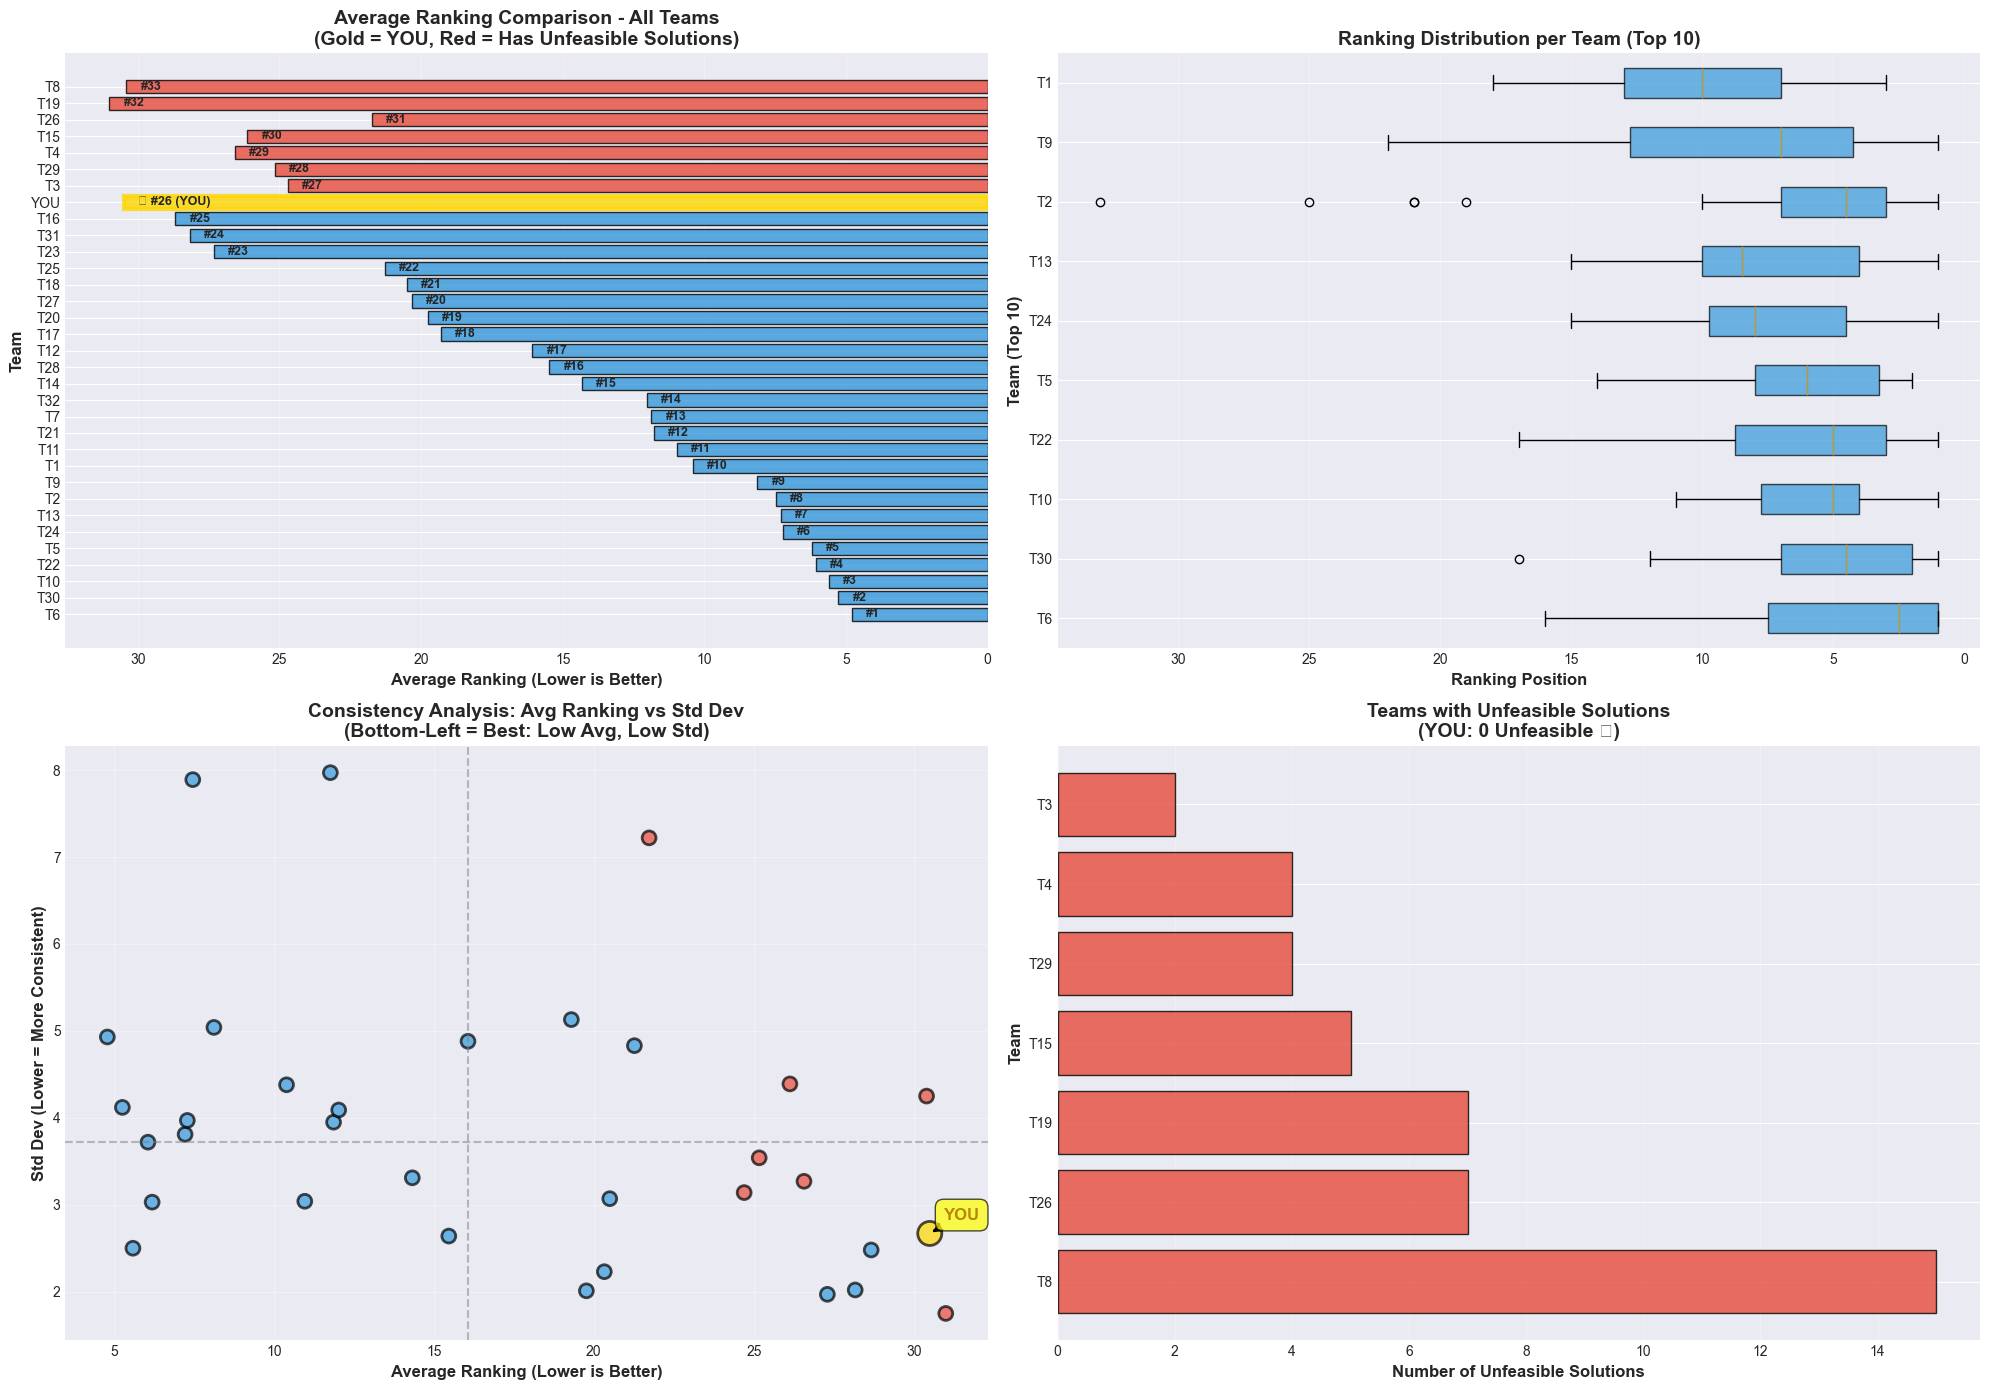

✅ Saved: average_ranking_comparison.png


In [ ]:
# Visualization: Average Ranking Comparison
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# 1. Bar chart of average rankings (sorted)
ax1 = axes[0, 0]
colors = ['#FFD700' if team == 'YOU' else '#e74c3c' if unf > 0 else '#3498db' 
          for team, unf in zip(df_team_rankings['Team'], df_team_rankings['Unfeasible Solutions'])]
bars = ax1.barh(df_team_rankings['Team'], df_team_rankings['Avg Ranking'], color=colors, alpha=0.8, edgecolor='black')

# Highlight your bar
your_idx = df_team_rankings[df_team_rankings['Team'] == 'YOU'].index[0]
bars[your_idx].set_linewidth(3)
bars[your_idx].set_edgecolor('gold')

ax1.set_xlabel('Average Ranking (Lower is Better)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Team', fontsize=12, fontweight='bold')
ax1.set_title('Average Ranking Comparison - All Teams\n(Gold = YOU, Red = Has Unfeasible Solutions)', 
              fontsize=14, fontweight='bold')
ax1.invert_xaxis()  # Lower rank (better) on the right
ax1.grid(axis='x', alpha=0.3)

# Add ranking labels
for idx, (team, avg, final) in enumerate(zip(df_team_rankings['Team'], 
                                              df_team_rankings['Avg Ranking'],
                                              df_team_rankings['Final Ranking'])):
    label = f"#{int(final)}" if team != 'YOU' else f"🏆 #{int(final)} (YOU)"
    ax1.text(avg - 0.5, idx, label, va='center', fontweight='bold', fontsize=9)

# 2. Box plot of ranking distribution
ax2 = axes[0, 1]
ranking_data = []
team_labels = []
for team in df_team_rankings['Team'][:10]:  # Top 10 only
    if team == 'YOU':
        ranking_data.append(team_rankings['YOU'])
    else:
        ranking_data.append(team_rankings[team])
    team_labels.append(team)

bp = ax2.boxplot(ranking_data, labels=team_labels, patch_artist=True, vert=False)
for i, (patch, team) in enumerate(zip(bp['boxes'], team_labels)):
    if team == 'YOU':
        patch.set_facecolor('#FFD700')
        patch.set_linewidth(3)
    else:
        patch.set_facecolor('#3498db')
    patch.set_alpha(0.7)

ax2.set_xlabel('Ranking Position', fontsize=12, fontweight='bold')
ax2.set_ylabel('Team (Top 10)', fontsize=12, fontweight='bold')
ax2.set_title('Ranking Distribution per Team (Top 10)', fontsize=14, fontweight='bold')
ax2.invert_xaxis()
ax2.grid(axis='x', alpha=0.3)

# 3. Scatter plot: Avg Ranking vs Std Dev
ax3 = axes[1, 0]
colors3 = ['gold' if team == 'YOU' else '#e74c3c' if unf > 0 else '#3498db' 
           for team, unf in zip(df_team_rankings['Team'], df_team_rankings['Unfeasible Solutions'])]
sizes = [300 if team == 'YOU' else 100 for team in df_team_rankings['Team']]

scatter = ax3.scatter(df_team_rankings['Avg Ranking'], df_team_rankings['Std Dev'], 
                     c=colors3, s=sizes, alpha=0.7, edgecolor='black', linewidth=2)

# Annotate YOU
your_row_idx = df_team_rankings[df_team_rankings['Team'] == 'YOU'].index[0]
your_avg = df_team_rankings.loc[your_row_idx, 'Avg Ranking']
your_std = df_team_rankings.loc[your_row_idx, 'Std Dev']
ax3.annotate('YOU', (your_avg, your_std), xytext=(10, 10), textcoords='offset points',
            fontsize=12, fontweight='bold', color='darkgoldenrod',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2))

ax3.set_xlabel('Average Ranking (Lower is Better)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Std Dev (Lower = More Consistent)', fontsize=12, fontweight='bold')
ax3.set_title('Consistency Analysis: Avg Ranking vs Std Dev\n(Bottom-Left = Best: Low Avg, Low Std)', 
              fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)

# Add quadrant lines
median_avg = df_team_rankings['Avg Ranking'].median()
median_std = df_team_rankings['Std Dev'].median()
ax3.axvline(x=median_avg, color='gray', linestyle='--', alpha=0.5)
ax3.axhline(y=median_std, color='gray', linestyle='--', alpha=0.5)

# 4. Unfeasible solutions count
ax4 = axes[1, 1]
df_with_unfeasible = df_team_rankings[df_team_rankings['Unfeasible Solutions'] > 0].sort_values('Unfeasible Solutions', ascending=False)
if len(df_with_unfeasible) > 0:
    ax4.barh(df_with_unfeasible['Team'], df_with_unfeasible['Unfeasible Solutions'], 
            color='#e74c3c', alpha=0.8, edgecolor='black')
    ax4.set_xlabel('Number of Unfeasible Solutions', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Team', fontsize=12, fontweight='bold')
    ax4.set_title('Teams with Unfeasible Solutions\n(YOU: 0 Unfeasible ✅)', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'No teams have unfeasible solutions', 
            ha='center', va='center', transform=ax4.transAxes, fontsize=14)
    ax4.set_title('Teams with Unfeasible Solutions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('average_ranking_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: average_ranking_comparison.png")


### Visualizations - Your Performance


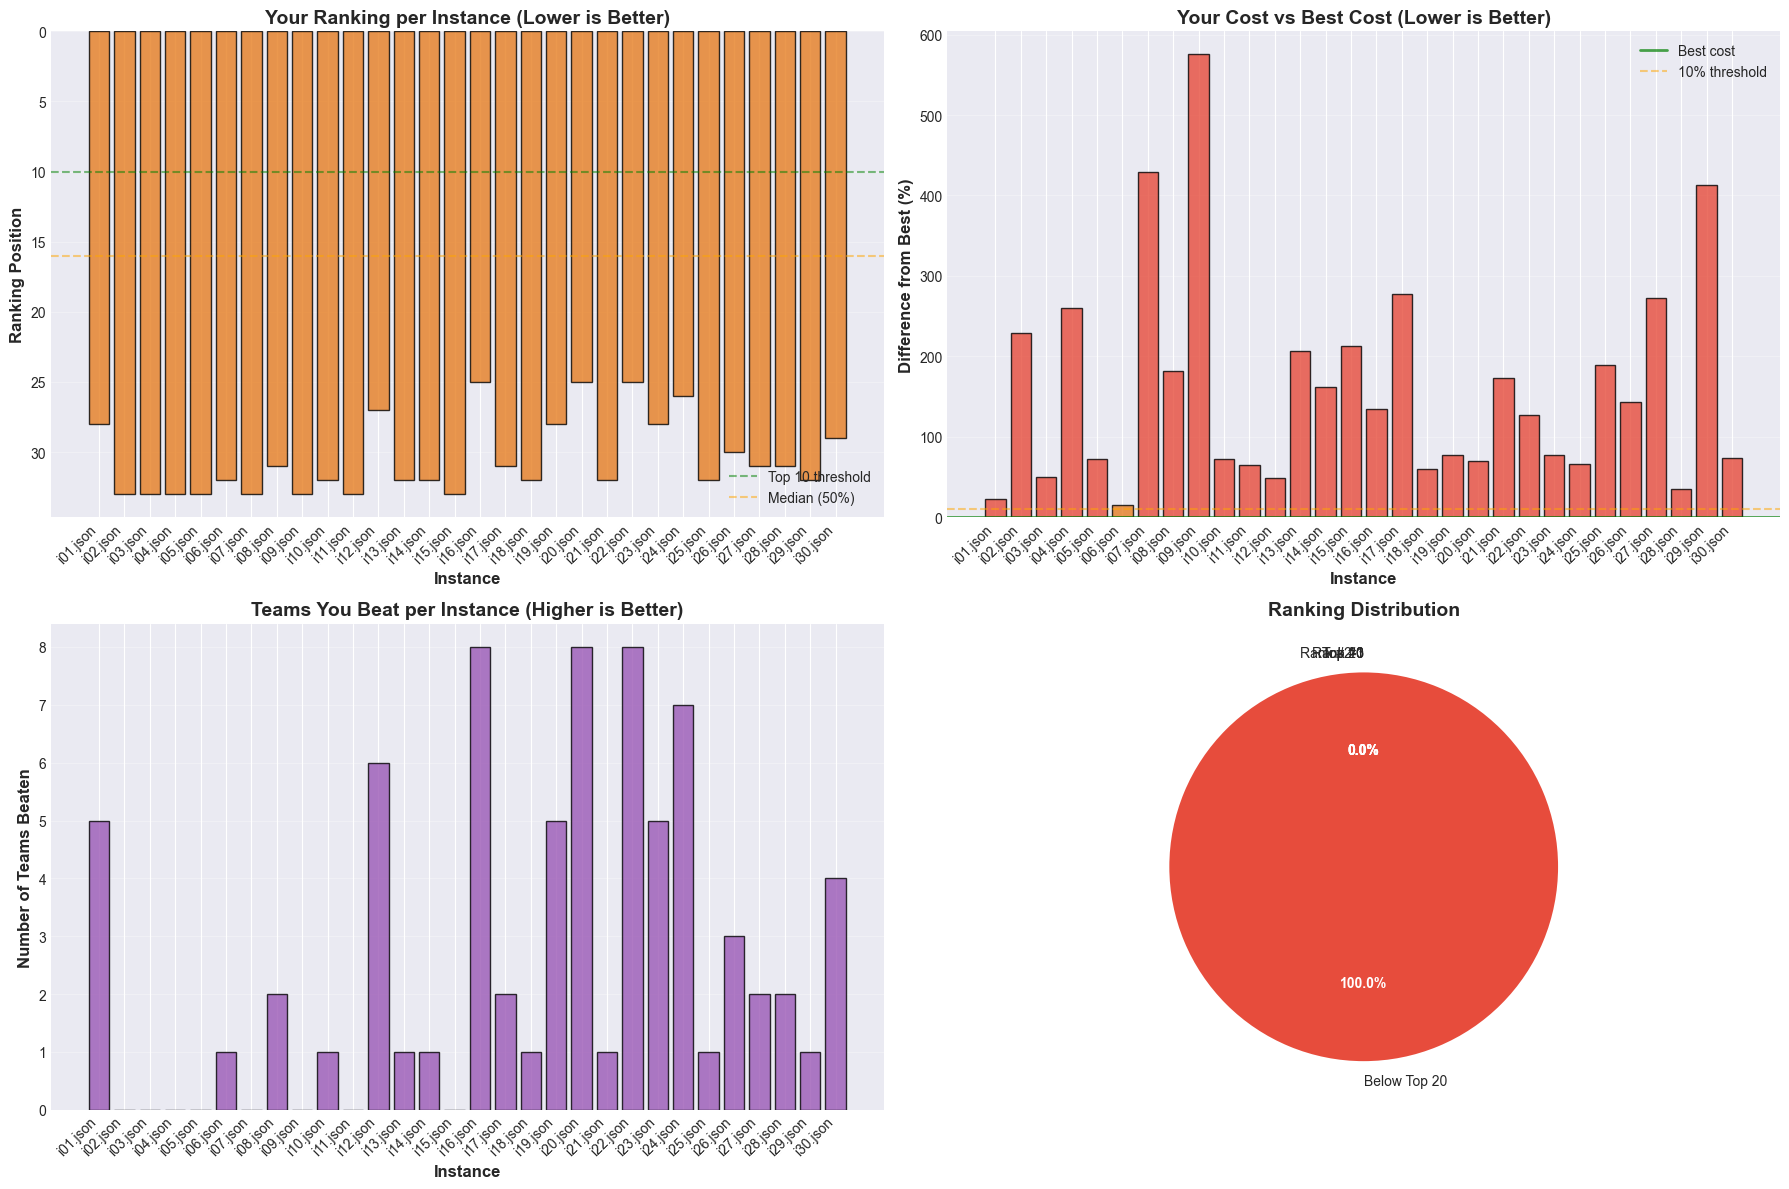

✅ Saved: my_ranking_analysis.png


In [ ]:
# Visualization 1: Your Ranking per Instance
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Bar chart of your ranking
ax1 = axes[0, 0]
colors = ['#FFD700' if x == 1 else '#C0C0C0' if x == 2 else '#CD7F32' if x == 3 else '#27ae60' if x <= 10 else '#3498db' if x <= 20 else '#e67e22' for x in my_ranking_df['My Ranking']]
bars = ax1.bar(my_ranking_df['Instance'], my_ranking_df['My Ranking'], color=colors, alpha=0.8, edgecolor='black')
ax1.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='Top 10 threshold')
ax1.axhline(y=16, color='orange', linestyle='--', alpha=0.5, label='Median (50%)')
ax1.set_xlabel('Instance', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ranking Position', fontsize=12, fontweight='bold')
ax1.set_title('Your Ranking per Instance (Lower is Better)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()  # Lower rank at top
ax1.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# 2. Difference from best cost (%)
ax2 = axes[0, 1]
colors2 = ['#27ae60' if x == 0 else '#8bc34a' if x <= 5 else '#f1c40f' if x <= 10 else '#e67e22' if x <= 20 else '#e74c3c' for x in my_ranking_df['Diff %']]
ax2.bar(my_ranking_df['Instance'], my_ranking_df['Diff %'], color=colors2, alpha=0.8, edgecolor='black')
ax2.axhline(y=0, color='green', linestyle='-', linewidth=2, alpha=0.7, label='Best cost')
ax2.axhline(y=10, color='orange', linestyle='--', alpha=0.5, label='10% threshold')
ax2.set_xlabel('Instance', fontsize=12, fontweight='bold')
ax2.set_ylabel('Difference from Best (%)', fontsize=12, fontweight='bold')
ax2.set_title('Your Cost vs Best Cost (Lower is Better)', fontsize=14, fontweight='bold')
ax2.legend()
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# 3. Teams beaten per instance
ax3 = axes[1, 0]
ax3.bar(my_ranking_df['Instance'], my_ranking_df['Teams Beaten (Total)'], color='#9b59b6', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Instance', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Teams Beaten', fontsize=12, fontweight='bold')
ax3.set_title('Teams You Beat per Instance (Higher is Better)', fontsize=14, fontweight='bold')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# 4. Ranking distribution pie chart
ax4 = axes[1, 1]
ranking_categories = {
    'Rank #1': len(my_ranking_df[my_ranking_df['My Ranking'] == 1]),
    'Rank #2-3': len(my_ranking_df[(my_ranking_df['My Ranking'] >= 2) & (my_ranking_df['My Ranking'] <= 3)]),
    'Top 10': len(my_ranking_df[(my_ranking_df['My Ranking'] >= 4) & (my_ranking_df['My Ranking'] <= 10)]),
    'Top 20': len(my_ranking_df[(my_ranking_df['My Ranking'] >= 11) & (my_ranking_df['My Ranking'] <= 20)]),
    'Below Top 20': len(my_ranking_df[my_ranking_df['My Ranking'] > 20])
}
colors_pie = ['#FFD700', '#C0C0C0', '#27ae60', '#3498db', '#e74c3c']
wedges, texts, autotexts = ax4.pie(ranking_categories.values(), labels=ranking_categories.keys(), 
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax4.set_title('Ranking Distribution', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('my_ranking_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: my_ranking_analysis.png")

KeyError: 'Worst Cost (Others)'

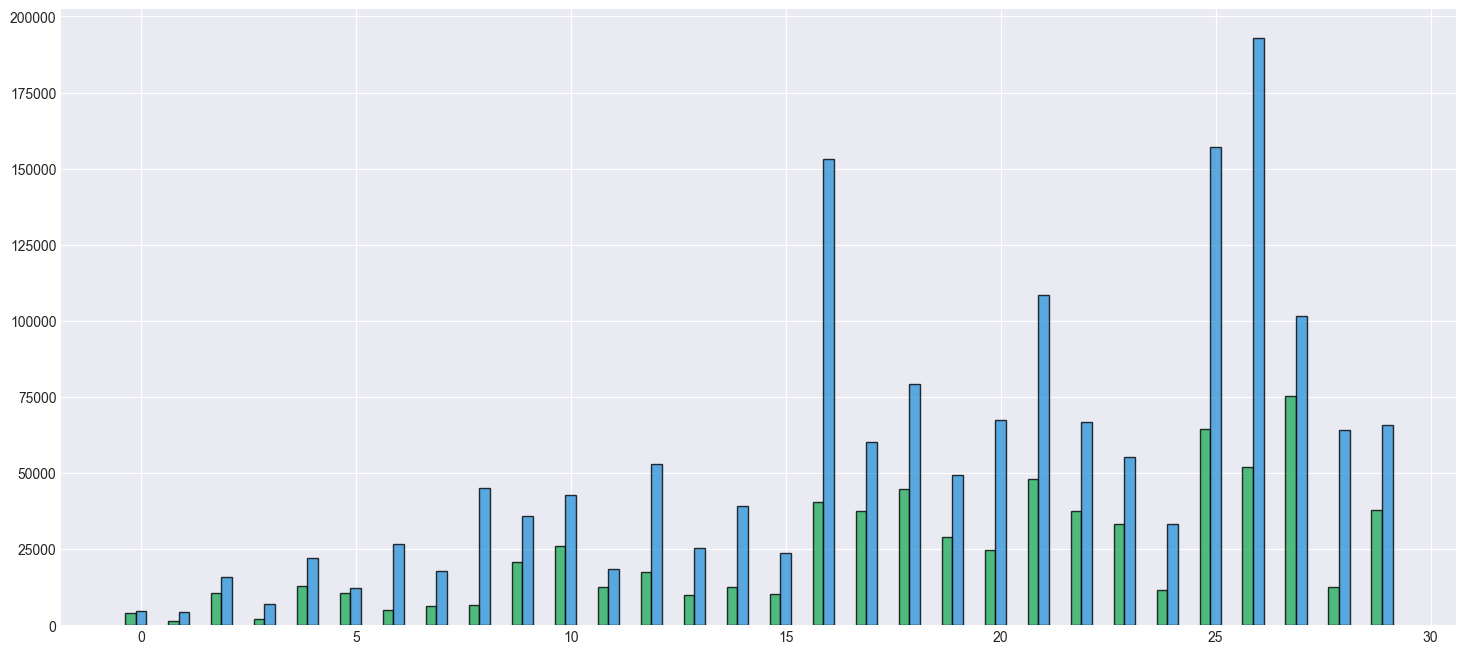

In [ ]:
# Visualization 2: Comparison Your Cost vs Best Cost vs Worst Cost
plt.figure(figsize=(18, 8))

x = np.arange(len(my_ranking_df))
width = 0.25

plt.bar(x - width, my_ranking_df['Best Cost (Others)'], width, label='Best Cost (Others)', 
        color='#27ae60', alpha=0.8, edgecolor='black')
plt.bar(x, my_ranking_df['My Cost'], width, label='Your Cost', 
        color='#3498db', alpha=0.8, edgecolor='black')
plt.bar(x + width, my_ranking_df['Worst Cost (Others)'], width, label='Worst Cost (Others)', 
        color='#e74c3c', alpha=0.8, edgecolor='black')

plt.xlabel('Instance', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Cost Comparison: You vs Others (Best & Worst)', fontsize=14, fontweight='bold')
plt.xticks(x, my_ranking_df['Instance'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('my_cost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: my_cost_comparison.png")

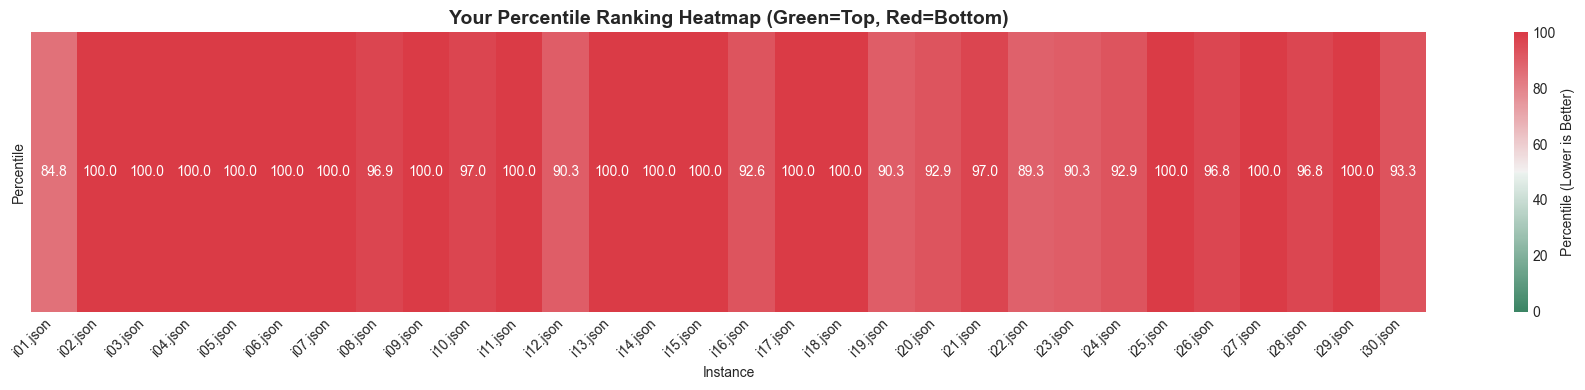

✅ Saved: my_percentile_heatmap.png


In [ ]:
# Visualization 3: Percentile Heatmap
plt.figure(figsize=(18, 4))

percentile_data = my_ranking_df[['Instance', 'Percentile']].set_index('Instance').T

# Create color mapping: green for top performers, red for bottom
cmap = sns.diverging_palette(150, 10, as_cmap=True)  # Green to Red

sns.heatmap(percentile_data, annot=True, fmt='.1f', cmap=cmap, 
            center=50, vmin=0, vmax=100,
            cbar_kws={'label': 'Percentile (Lower is Better)'})

plt.title('Your Percentile Ranking Heatmap (Green=Top, Red=Bottom)', 
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('my_percentile_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: my_percentile_heatmap.png")

### Export Your Ranking Results


In [ ]:
# Export your ranking results to CSV
my_ranking_df.to_csv('my_ranking_results.csv', index=False)
print("✅ Your ranking results saved to: my_ranking_results.csv")

# Export average ranking comparison
df_team_rankings.to_csv('average_ranking_all_teams.csv', index=False)
print("✅ Average ranking comparison saved to: average_ranking_all_teams.csv")

# Create comprehensive report
with open('my_ranking_report.txt', 'w', encoding='utf-8') as f:
    f.write("="*100 + "\n")
    f.write("COMPREHENSIVE RANKING REPORT - YOUR PERFORMANCE\n")
    f.write("="*100 + "\n\n")
    
    f.write("🏆 FINAL RANKING POSITION (Based on Average Ranking)\n")
    f.write("-" * 80 + "\n")
    f.write(f"   Final Ranking: #{your_final_ranking} out of 33 participants\n")
    f.write(f"   Average Ranking: {your_avg_ranking:.2f}\n")
    f.write(f"   Teams above you: {len(teams_above)}\n")
    f.write(f"   Teams below you: {len(teams_below)}\n")
    f.write(f"   Unfeasible Solutions: 0 (All solutions are FEASIBLE ✅)\n\n")
    
    f.write(f"Total Instances Analyzed: {total_instances}\n\n")
    
    f.write("📊 RANKING STATISTICS (Per Instance):\n")
    f.write(f"   • Rank #1 (Best): {rank_1_count} times ({rank_1_count/total_instances*100:.1f}%)\n")
    f.write(f"   • Top 3: {rank_top3_count} times ({rank_top3_count/total_instances*100:.1f}%)\n")
    f.write(f"   • Top 5: {rank_top5_count} times ({rank_top5_count/total_instances*100:.1f}%)\n")
    f.write(f"   • Top 10: {rank_top10_count} times ({rank_top10_count/total_instances*100:.1f}%)\n")
    f.write(f"   • Top 50%: {rank_top50pct_count} times ({rank_top50pct_count/total_instances*100:.1f}%)\n\n")
    
    f.write("📈 RANKING PERFORMANCE (Per Instance):\n")
    f.write(f"   • Average Ranking: #{avg_ranking:.1f}\n")
    f.write(f"   • Median Ranking: #{median_ranking:.0f}\n")
    f.write(f"   • Best Ranking: #{int(best_ranking)}\n")
    f.write(f"   • Worst Ranking: #{int(worst_ranking)}\n\n")
    
    f.write("💰 COST COMPARISON:\n")
    f.write(f"   • Average difference from best: {avg_diff_from_best:+.2f}%\n")
    f.write(f"   • Total teams beaten: {int(total_teams_beaten)}\n")
    f.write(f"   • Average teams beaten per instance: {total_teams_beaten/total_instances:.1f}\n\n")
    
    f.write("="*100 + "\n")
    f.write("AVERAGE RANKING COMPARISON - ALL TEAMS\n")
    f.write("="*100 + "\n\n")
    f.write(df_team_rankings.to_string(index=False))
    f.write("\n\n")
    
    f.write("🏆 TOP 5 BEST PERFORMANCES (Per Instance):\n")
    f.write("-" * 80 + "\n")
    for idx, row in my_ranking_df.nsmallest(5, 'My Ranking').iterrows():
        f.write(f"   {row['Instance']:10s} - Rank #{int(row['My Ranking']):2d} / {int(row['Total Participants']):2d} ")
        f.write(f"(Cost: {int(row['My Cost']):8,}, Diff from best: {row['Diff %']:+6.2f}%)\n")
    
    f.write("\n📉 NEED IMPROVEMENT (Bottom 5 Per Instance):\n")
    f.write("-" * 80 + "\n")
    for idx, row in my_ranking_df.nlargest(5, 'My Ranking').iterrows():
        f.write(f"   {row['Instance']:10s} - Rank #{int(row['My Ranking']):2d} / {int(row['Total Participants']):2d} ")
        f.write(f"(Cost: {int(row['My Cost']):8,}, Diff from best: {row['Diff %']:+6.2f}%)\n")
    
    f.write("\n" + "="*100 + "\n")
    f.write("DETAILED RANKING BY INSTANCE\n")
    f.write("="*100 + "\n\n")
    f.write(my_ranking_df.to_string(index=False))

print("✅ Comprehensive report saved to: my_ranking_report.txt")

print("\n" + "="*100)
print("✨ ALL FILES GENERATED SUCCESSFULLY!")
print("="*100)
print("\nGenerated files:")
print("  📄 my_ranking_results.csv - Your detailed ranking data per instance")
print("  📄 average_ranking_all_teams.csv - Average ranking comparison for all teams")
print("  📄 my_ranking_report.txt - Comprehensive text report")
print("  📊 my_ranking_analysis.png - 4-panel analysis visualization")
print("  📊 my_cost_comparison.png - Cost comparison chart")
print("  📊 my_percentile_heatmap.png - Percentile heatmap")
print("  📊 average_ranking_comparison.png - Average ranking comparison visualization")
print("\n" + "="*100)


✅ Your ranking results saved to: my_ranking_results.csv
✅ Comprehensive report saved to: my_ranking_report.txt

✨ ALL FILES GENERATED SUCCESSFULLY!

Generated files:
  📄 my_ranking_results.csv - Your detailed ranking data
  📄 my_ranking_report.txt - Comprehensive text report
  📊 my_ranking_analysis.png - 4-panel analysis visualization
  📊 my_cost_comparison.png - Cost comparison chart
  📊 my_percentile_heatmap.png - Percentile heatmap



## 7. Best Performing Runs Analysis


In [ ]:
print("="*100)
print("BEST PERFORMING RUNS (Frequency of achieving best cost)")
print("="*100)

# Count frequency of each run achieving best cost
run_counts = {}
for runs_str in results_df['Best Run(s)']:
    for run in runs_str.split(', '):
        run_counts[run] = run_counts.get(run, 0) + 1

# Sort by frequency
sorted_runs = sorted(run_counts.items(), key=lambda x: x[1], reverse=True)

print(f"\n{'Rank':<6} {'Run ID':<8} {'Times Best':<12} {'Percentage'}")
print("-" * 50)
for rank, (run_id, count) in enumerate(sorted_runs[:10], 1):
    percentage = (count / len(results_df)) * 100
    print(f"{rank:<6} {run_id:<8} {count:<12} {percentage:.1f}%")

BEST PERFORMING RUNS (Frequency of achieving best cost)

Rank   Run ID   Times Best   Percentage
--------------------------------------------------
1      T6       13           43.3%
2      T24      4            13.3%
3      T2       4            13.3%
4      T30      4            13.3%
5      T13      3            10.0%
6      T10      1            3.3%
7      T22      1            3.3%
8      T9       1            3.3%


## 8. Visualizations

### 8.1 Best Cost per Instance


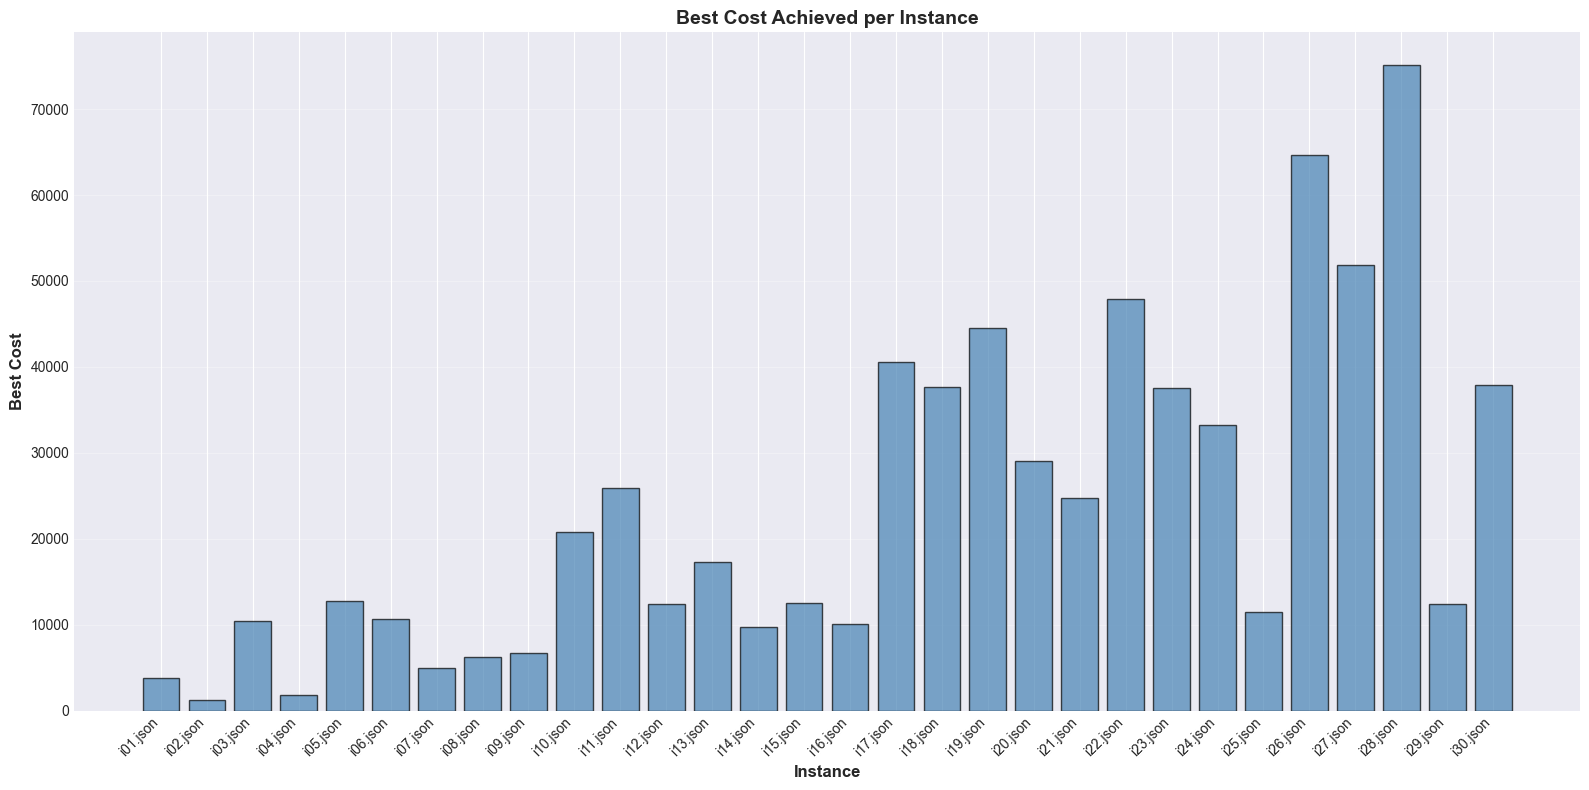

✅ Saved: ranking_best_costs.png


In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(results_df['Instance'], results_df['Best Cost'], color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Instance', fontsize=12, fontweight='bold')
plt.ylabel('Best Cost', fontsize=12, fontweight='bold')
plt.title('Best Cost Achieved per Instance', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('ranking_best_costs.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ranking_best_costs.png")

### 8.2 Algorithm Consistency (Runs within 10% and 20% of Best)


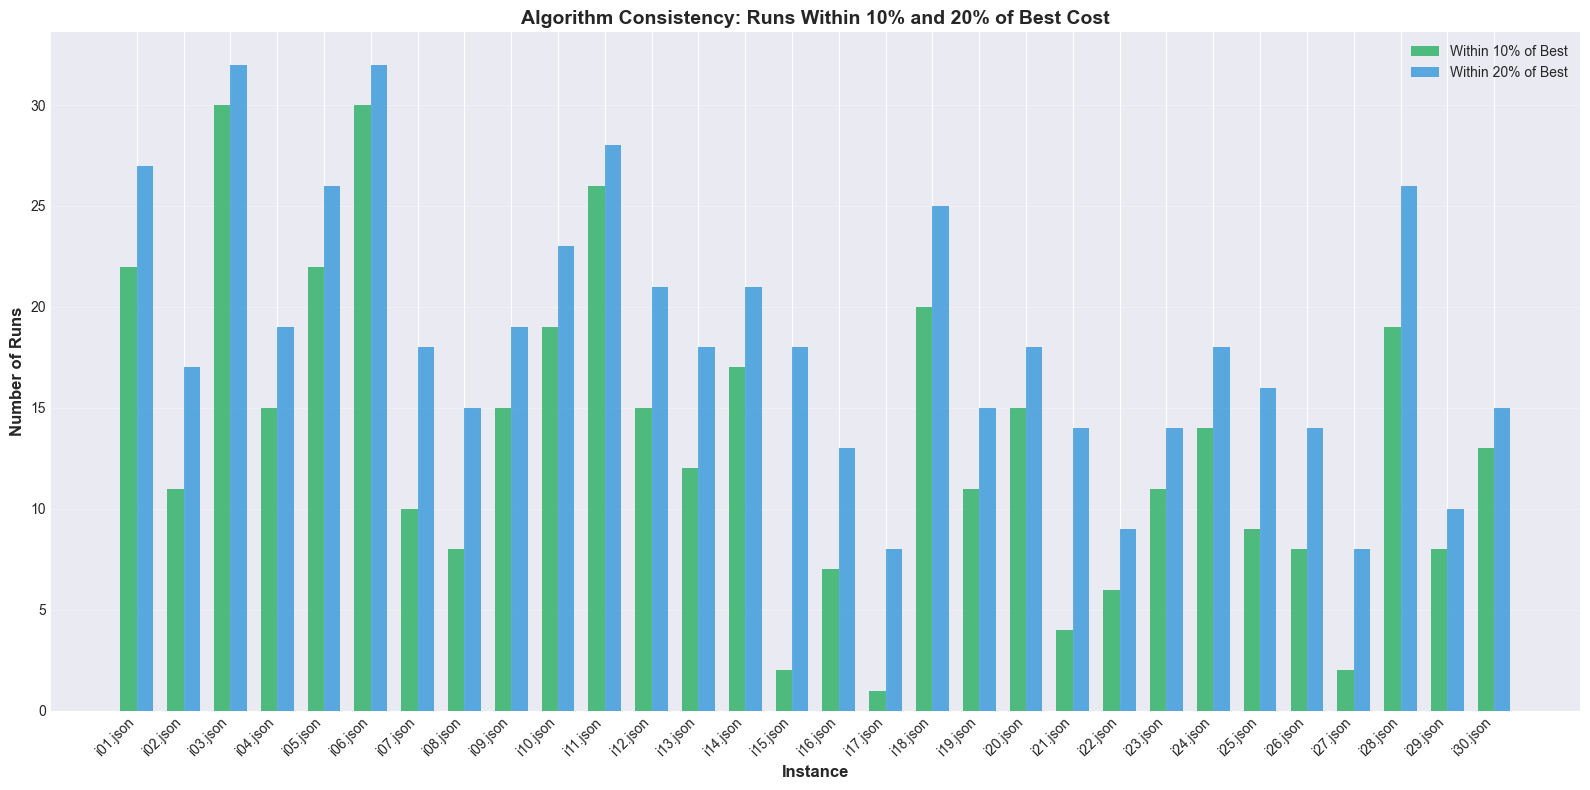

✅ Saved: ranking_consistency.png


In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Within 10% of Best'], width, 
               label='Within 10% of Best', color='#27ae60', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Within 20% of Best'], width,
               label='Within 20% of Best', color='#3498db', alpha=0.8)

ax.set_xlabel('Instance', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Runs', fontsize=12, fontweight='bold')
ax.set_title('Algorithm Consistency: Runs Within 10% and 20% of Best Cost', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Instance'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('ranking_consistency.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ranking_consistency.png")

### 8.3 Failed Runs per Instance


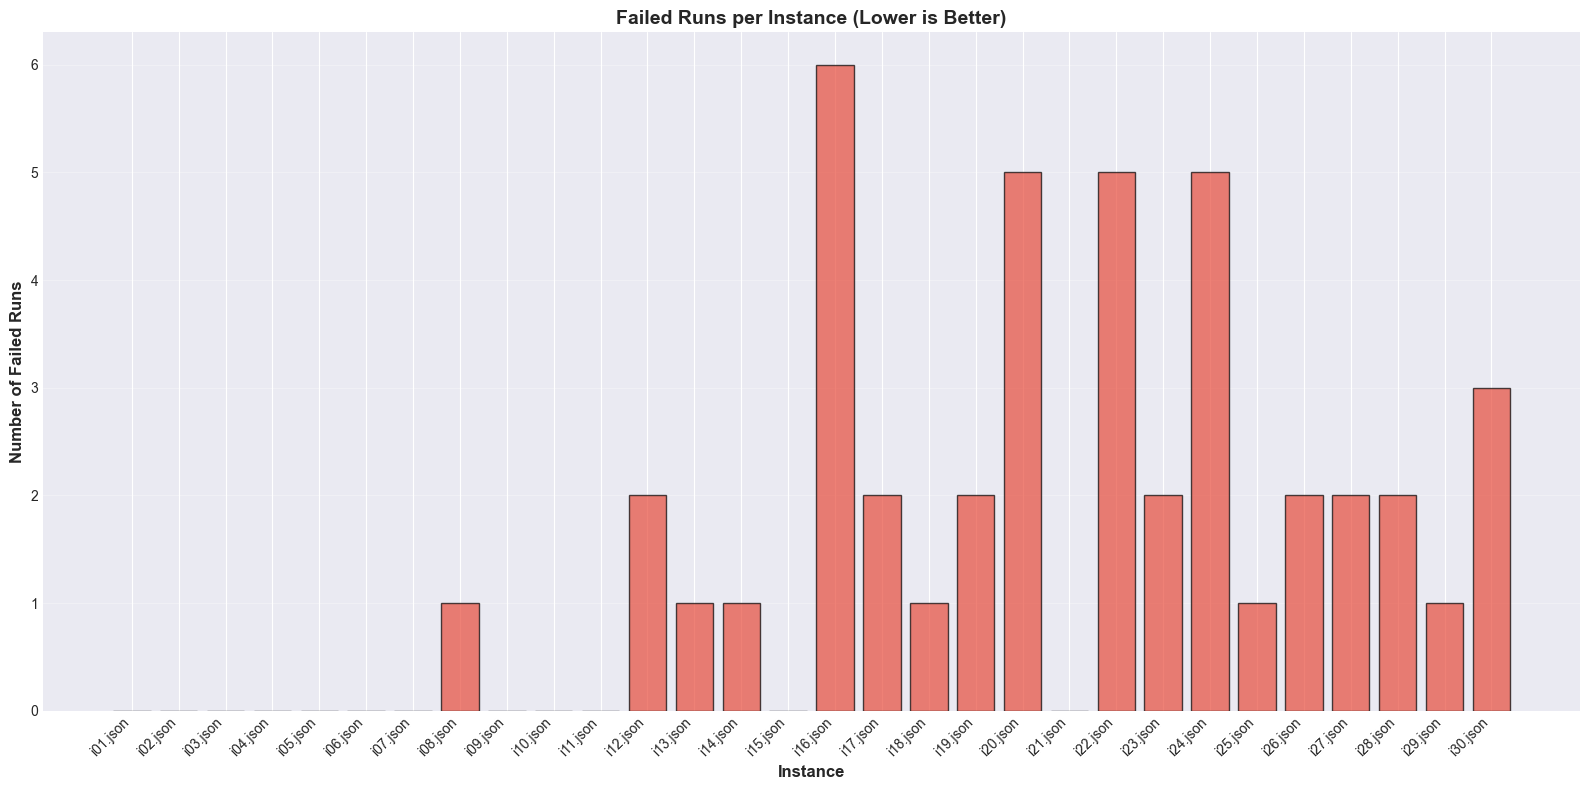

✅ Saved: ranking_failed_runs.png


In [ ]:
plt.figure(figsize=(16, 8))
colors = ['#e74c3c' if x > 0 else '#27ae60' for x in results_df['Failed Runs']]
plt.bar(results_df['Instance'], results_df['Failed Runs'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Instance', fontsize=12, fontweight='bold')
plt.ylabel('Number of Failed Runs', fontsize=12, fontweight='bold')
plt.title('Failed Runs per Instance (Lower is Better)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('ranking_failed_runs.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ranking_failed_runs.png")

### 8.4 Consistency Heatmap


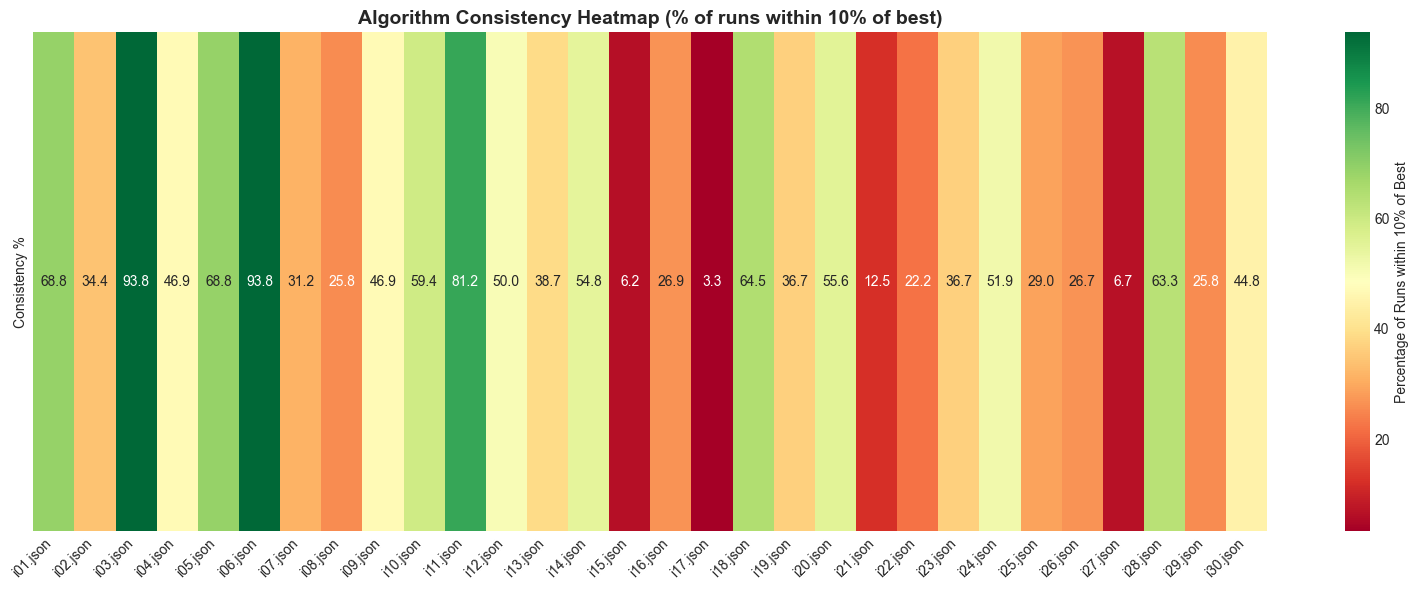

✅ Saved: ranking_consistency_heatmap.png


In [ ]:
plt.figure(figsize=(16, 6))
consistency_pct = (results_df['Within 10% of Best'] / results_df['Total Valid Runs'] * 100).values.reshape(1, -1)
sns.heatmap(consistency_pct, annot=True, fmt='.1f', cmap='RdYlGn', 
            xticklabels=results_df['Instance'], yticklabels=['Consistency %'],
            cbar_kws={'label': 'Percentage of Runs within 10% of Best'})
plt.title('Algorithm Consistency Heatmap (% of runs within 10% of best)', 
          fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('ranking_consistency_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ranking_consistency_heatmap.png")

### 8.5 Best Performing Runs Distribution


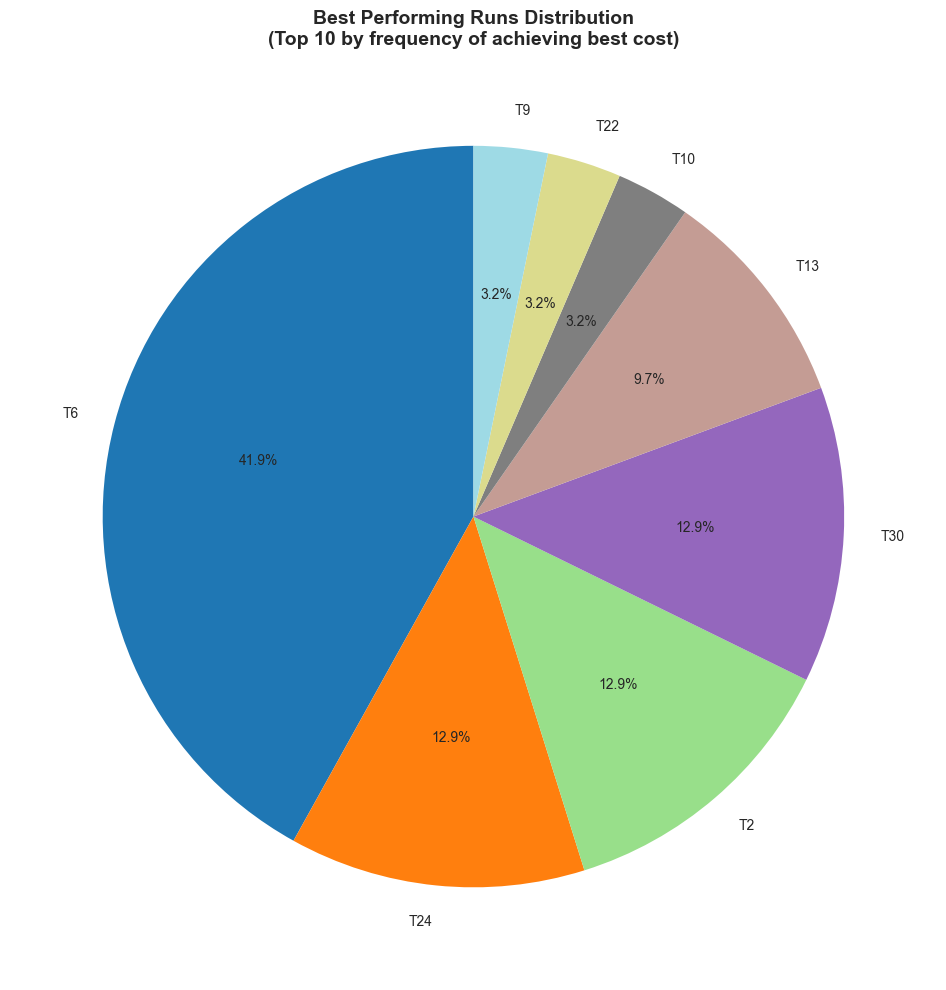

✅ Saved: ranking_best_runs_distribution.png


In [ ]:
plt.figure(figsize=(10, 10))
top_runs = dict(sorted_runs[:10])
colors_pie = plt.cm.tab20(np.linspace(0, 1, len(top_runs)))
plt.pie(top_runs.values(), labels=top_runs.keys(), autopct='%1.1f%%',
        colors=colors_pie, startangle=90)
plt.title('Best Performing Runs Distribution\n(Top 10 by frequency of achieving best cost)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('ranking_best_runs_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ranking_best_runs_distribution.png")

## 9. Summary

Analisis ini menghasilkan:

- **CSV File**: `ranking_analysis_results.csv` - Tabel lengkap hasil analisis
- **5 Visualizations**:
  1. `ranking_best_costs.png` - Best cost per instance
  2. `ranking_consistency.png` - Konsistensi algoritma
  3. `ranking_failed_runs.png` - Failed runs per instance
  4. `ranking_consistency_heatmap.png` - Heatmap konsistensi
  5. `ranking_best_runs_distribution.png` - Distribusi best runs

### Key Findings:

Lihat output statistik di atas untuk mengetahui:

- Ranking Anda pada setiap instance
- Run configuration mana yang paling sering menghasilkan best cost
- Tingkat konsistensi algoritma pada setiap instance
- Instance mana yang paling challenging (banyak failed runs)
